In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split  # For any further splits if needed
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import scripts.preprocess as pp
import importlib

In [38]:
# load performance evaluation csv
performance_df = pd.read_csv('results/model_performance_summary_sig.csv', index_col=0)

In [39]:
performance_df.columns

Index(['model', 'TN', 'FP', 'FN', 'TP', 'accuracy', 'precision', 'sensitivity',
       'specificity', 'f1', 'mcc', 'roc_auc', 'pr_auc', 'roc_curve',
       'pr_curve'],
      dtype='object')

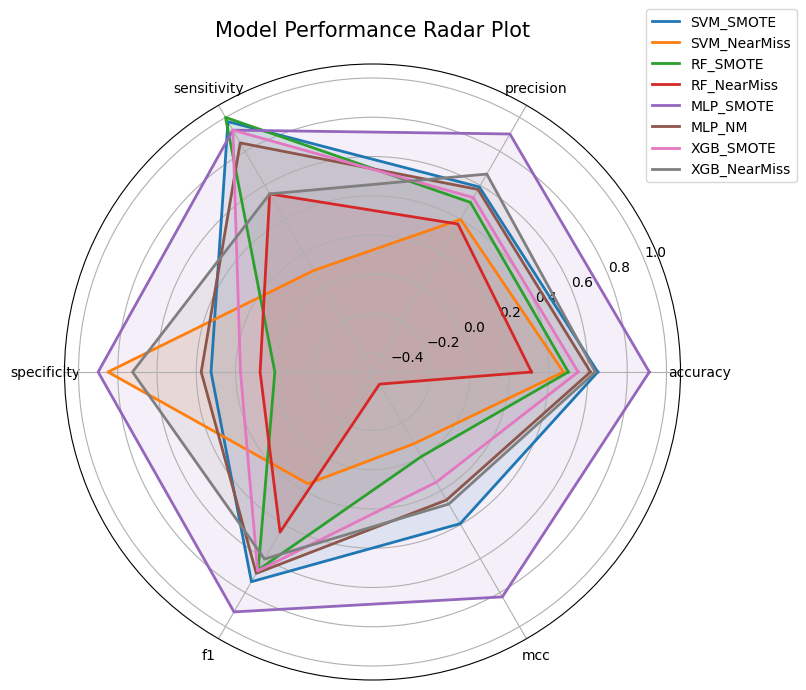

In [53]:

import matplotlib.pyplot as plt
import numpy as np

# Metrics to plot
metrics = ['accuracy', 'precision', 'sensitivity', 'specificity', 'f1', 'mcc']
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

for _, row in performance_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=row['model'], lw=2)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title("Model Performance Radar Plot", size=15, pad=20)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.savefig("results/plots/radar_plot_sig.png", dpi=300, bbox_inches='tight')  # Save first
plt.show()



In [41]:
import re
def parse_curve(s):
    # Extract all numbers from the string
    nums = re.findall(r"[-+]?\d*\.\d+|\d+", s)
    nums = list(map(float, nums))
    # Split half into fpr and tpr (since it's (array([...]), array([...])) )
    half = len(nums) // 2
    return np.array(nums[:half]), np.array(nums[half:])

# Apply to both columns
performance_df["roc_curve"] = performance_df["roc_curve"].apply(parse_curve)
performance_df["pr_curve"] = performance_df["pr_curve"].apply(parse_curve)


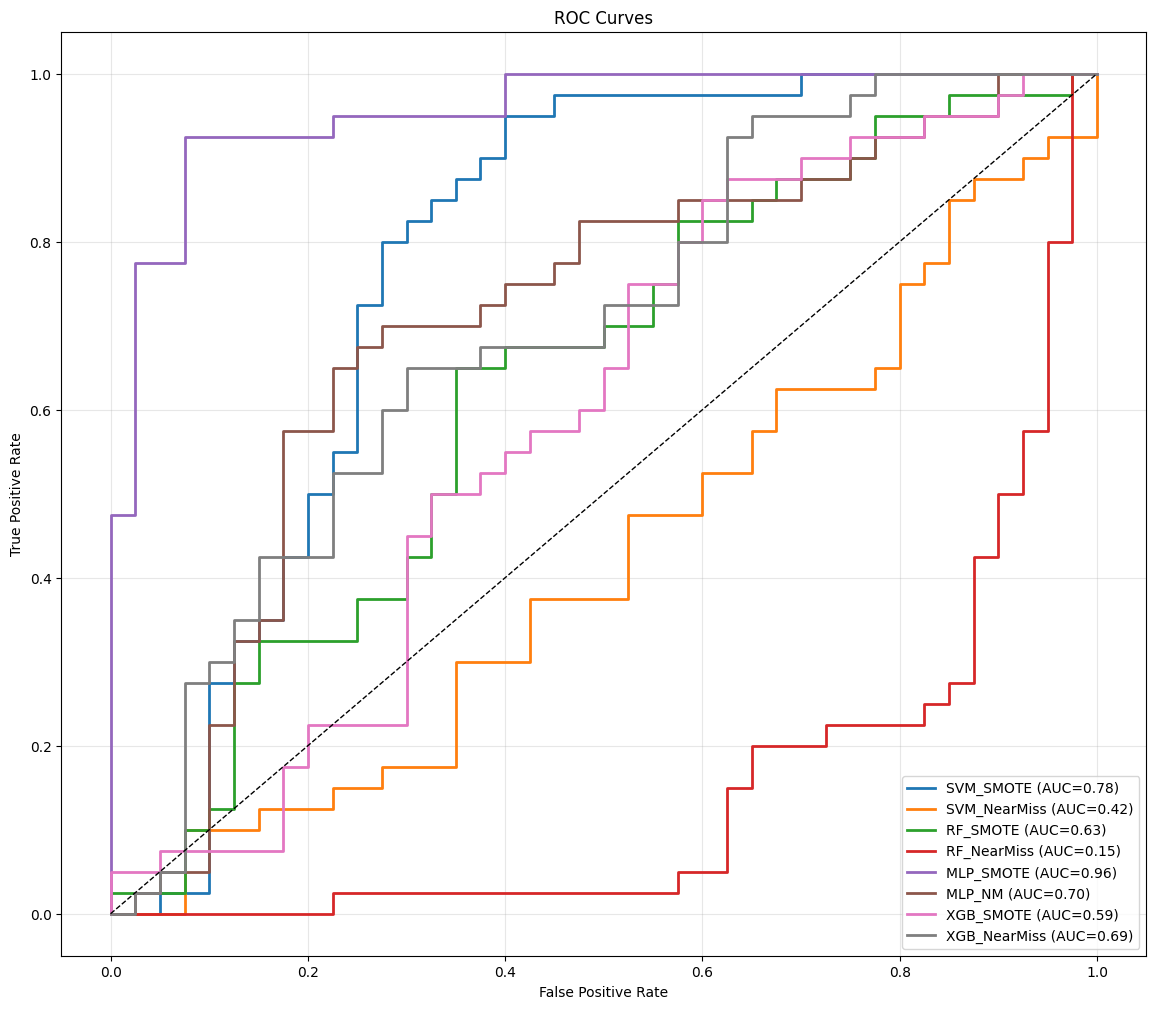

In [54]:
plt.figure(figsize=(14,12))
for _, row in performance_df.iterrows():
    fpr, tpr = row["roc_curve"]
    plt.plot(fpr, tpr, lw=2,
             label=f'{row["model"]} (AUC={row["roc_auc"]:.2f})')
plt.plot([0,1],[0,1],"k--",lw=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves"); plt.legend(); plt.grid(alpha=0.3)
# plt.savefig("results/plots/roc_curves_sig.png", bbox_inches='tight', dpi=300)
plt.show()

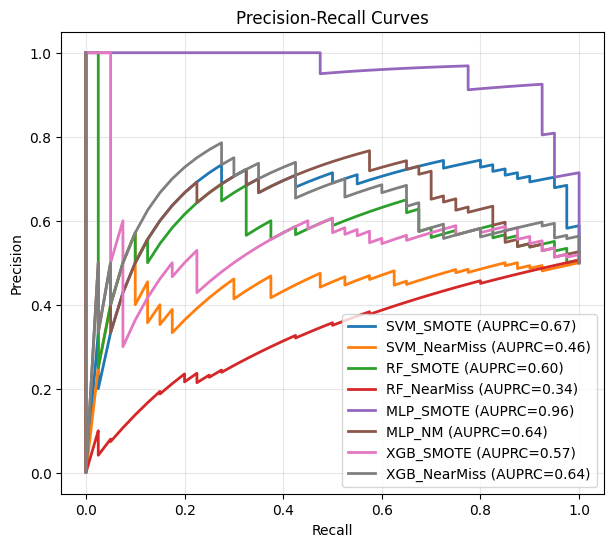

In [48]:
plt.figure(figsize=(7,6))
for _, row in performance_df.iterrows():
    precision, recall = row["pr_curve"]
    plt.plot(recall, precision, lw=2,
             label=f'{row["model"]} (AUPRC={row["pr_auc"]:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
# plt.savefig("results/plots/pr_curves_sig.png", bbox_inches='tight', dpi=300)


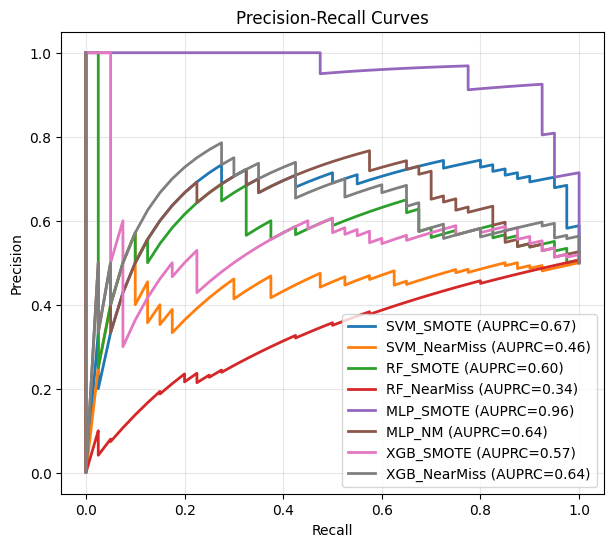

In [50]:
fig, ax = plt.subplots(figsize=(7,6))
for _, row in performance_df.iterrows():
    precision, recall = row["pr_curve"]
    ax.plot(recall, precision, lw=2,
            label=f'{row["model"]} (AUPRC={row["pr_auc"]:.2f})')

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision-Recall Curves")
ax.legend()
ax.grid(alpha=0.3)

fig.savefig("results/plots/pr_curves_sig.png", dpi=300, bbox_inches='tight')  # Saves the figure
plt.show()